## GAN (Rede Adversária Generativa) Dígitos

## Instalando bibliotecas

In [9]:
import tensorflow as tf
import matplotlib
import numpy as np

In [15]:
# Importação da base cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Reshape
from tensorflow.keras.regularizers import L1L2
import matplotlib.pyplot as plt

## Carregamento base de dados

In [4]:
(X_treinamento, _), (_, _) = mnist.load_data()

In [5]:
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Preprocessamento da base - normalizacao

In [6]:
X_treinamento = X_treinamento.astype('float32') / 255 

In [7]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size=60000).batch(batch_size=256)

In [11]:
type(X_treinamento)

tensorflow.python.data.ops.batch_op._BatchDataset

## Criação da Rede Neural - Gerador

In [13]:
# Gerador 100-500-500
gerador = Sequential()

gerador.add(Dense(units = 500, activation = 'relu', input_dim = 100, kernel_regularizer=L1L2(1e-5,1e-5)))
gerador.add(Dense(units = 500, activation = 'relu', input_dim = 100, kernel_regularizer=L1L2(1e-5,1e-5)))
gerador.add(Dense(units = 784, activation = 'relu', kernel_regularizer=L1L2(1e-5,1e-5)))
gerador.add(Reshape((28,28)))

gerador.summary()

/home/lucas/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,784 (2.65 MB)

 Trainable params: 693,784 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

## Criação da Rede Neural - Discriminador

In [16]:
# Discriminador (28,28)/784 -> 500 -> 500 -> 1
discriminador = Sequential()
discriminador.add(InputLayer(input_shape=(28,28)))
discriminador.add(Flatten())
discriminador.add(Dense(units = 500, activation = 'relu', kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.add(Dense(units = 500, activation = 'relu', kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.summary()

/home/lucas/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,501 (2.45 MB)

 Trainable params: 643,501 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Calcular erro

In [17]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [31]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

In [32]:
def discriminator_loss(real_output,fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [33]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [34]:
epochs = 100
noise_dim = 100

## Treinamento da GAN

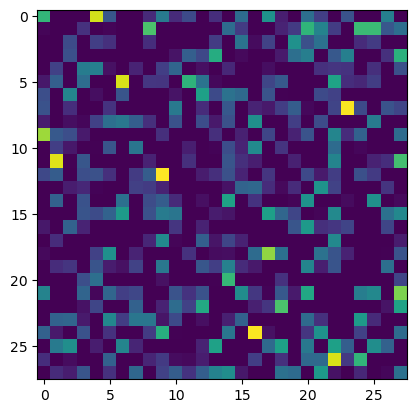

In [35]:
plt.imshow(gerador(tf.random.normal([256,noise_dim]))[1])

In [45]:
def train_step(images):
    noise = tf.random.normal([256,noise_dim])

    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_images = gerador(noise,training=True)

        real_output = discriminador(images, training=True)
        fake_output = discriminador(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output,fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,gerador.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,gerador.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminador.trainable_variables))

    return gen_loss,disc_loss

In [ ]:
for epoch in range(epochs):
    for image_batch in X_treinamento:
        gen_loss_batch, disc_loss_batch = train_step(image_batch)
    print(f'Época {epoch} | gen_loss: {gen_loss_batch} disc_loss {disc_loss_batch}')

2024-12-20 16:16:54.108645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 0 | gen_loss: 4.004024028778076 disc_loss 0.1396659016609192


2024-12-20 16:17:26.848650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 1 | gen_loss: 5.873697280883789 disc_loss 0.02516467496752739


2024-12-20 16:18:03.062159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 2 | gen_loss: 5.738808631896973 disc_loss 0.014460086822509766


2024-12-20 16:18:37.339593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 3 | gen_loss: 6.384330749511719 disc_loss 0.00882617849856615


2024-12-20 16:19:14.403647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 4 | gen_loss: 4.133408546447754 disc_loss 0.04872938245534897


2024-12-20 16:19:58.536166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 5 | gen_loss: 3.4014267921447754 disc_loss 0.09751100838184357


2024-12-20 16:20:36.106681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 6 | gen_loss: 4.627886772155762 disc_loss 0.030906543135643005


2024-12-20 16:21:14.985392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 7 | gen_loss: 6.32230281829834 disc_loss 0.013216087594628334


2024-12-20 16:21:46.562959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 8 | gen_loss: 7.0185546875 disc_loss 0.008067509159445763


2024-12-20 16:22:17.291910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 9 | gen_loss: 6.408908367156982 disc_loss 0.005693189799785614


2024-12-20 16:22:47.993832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 10 | gen_loss: 7.19633674621582 disc_loss 0.02904399484395981


2024-12-20 16:23:18.837800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 11 | gen_loss: 7.883074760437012 disc_loss 0.011466970667243004


2024-12-20 16:23:49.501103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 12 | gen_loss: 6.780418395996094 disc_loss 0.007982568815350533


2024-12-20 16:24:22.067570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 13 | gen_loss: 6.691405773162842 disc_loss 0.0028342362493276596


2024-12-20 16:24:53.946781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 14 | gen_loss: 8.079787254333496 disc_loss 0.0495196133852005


2024-12-20 16:25:25.429411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 15 | gen_loss: 7.290576934814453 disc_loss 0.0028975531458854675


2024-12-20 16:25:56.959735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 16 | gen_loss: 7.845484733581543 disc_loss 0.0011763969669118524


2024-12-20 16:26:33.117436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 17 | gen_loss: 8.207563400268555 disc_loss 0.0015286845155060291


2024-12-20 16:27:05.144262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 18 | gen_loss: 9.09316635131836 disc_loss 0.003920582123100758


2024-12-20 16:27:36.588067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 19 | gen_loss: 9.034784317016602 disc_loss 0.006094928830862045


2024-12-20 16:28:10.541480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 20 | gen_loss: 8.820795059204102 disc_loss 0.0013765892945230007


2024-12-20 16:28:42.890447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 21 | gen_loss: 6.803958892822266 disc_loss 0.003330040257424116


2024-12-20 16:29:14.299128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 22 | gen_loss: 9.979202270507812 disc_loss 0.0003088345401920378


2024-12-20 16:29:50.944371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 23 | gen_loss: 6.350272178649902 disc_loss 0.014614440500736237


2024-12-20 16:30:23.663318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 24 | gen_loss: 8.904993057250977 disc_loss 0.009454356506466866


2024-12-20 16:30:54.957642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 25 | gen_loss: 9.758279800415039 disc_loss 0.0009256276534870267


2024-12-20 16:31:26.427243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 26 | gen_loss: 8.432538032531738 disc_loss 0.0015449445927515626


2024-12-20 16:31:59.062863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 27 | gen_loss: 11.275825500488281 disc_loss 0.0005454939091578126


2024-12-20 16:32:31.432417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 28 | gen_loss: 8.302732467651367 disc_loss 0.0026407171972095966


2024-12-20 16:33:04.732521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 29 | gen_loss: 9.145489692687988 disc_loss 0.003108097705990076


2024-12-20 16:33:54.569603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 30 | gen_loss: 11.270100593566895 disc_loss 0.000688948726747185


2024-12-20 16:34:54.634019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 31 | gen_loss: 12.365612030029297 disc_loss 0.0006191019201651216


2024-12-20 16:36:13.305380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 32 | gen_loss: 8.844396591186523 disc_loss 0.0031226500868797302


2024-12-20 16:37:07.152068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 33 | gen_loss: 7.3799238204956055 disc_loss 0.003840049495920539


2024-12-20 16:38:01.877528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 34 | gen_loss: 8.414986610412598 disc_loss 0.001770246890373528
Época 35 | gen_loss: 7.668254852294922 disc_loss 0.0010365300113335252


2024-12-20 16:39:26.813023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-20 16:40:31.735997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 36 | gen_loss: 12.03439998626709 disc_loss 0.001352934050373733


2024-12-20 16:41:27.629432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 37 | gen_loss: 10.032892227172852 disc_loss 0.0019252289785072207
Época 38 | gen_loss: 8.722003936767578 disc_loss 0.0011576110264286399


2024-12-20 16:42:17.408304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-20 16:43:09.862561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 39 | gen_loss: 10.02255630493164 disc_loss 0.04885971546173096


2024-12-20 16:44:04.153434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 40 | gen_loss: 13.462353706359863 disc_loss 4.396299482323229e-05


2024-12-20 16:45:32.552061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 41 | gen_loss: 19.290983200073242 disc_loss 0.02297031320631504


2024-12-20 16:46:26.325633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 42 | gen_loss: 12.346511840820312 disc_loss 0.00012290907034184784


2024-12-20 16:47:17.391992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 43 | gen_loss: 7.017238616943359 disc_loss 0.006313106045126915


2024-12-20 16:48:10.753464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 44 | gen_loss: 9.655158996582031 disc_loss 0.0025417155120521784


2024-12-20 16:49:00.228798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 45 | gen_loss: 12.766355514526367 disc_loss 0.0002801808586809784


2024-12-20 16:49:48.645584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 46 | gen_loss: 8.572864532470703 disc_loss 0.0033499430865049362


2024-12-20 16:50:38.146590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 47 | gen_loss: 10.958780288696289 disc_loss 0.0010193485068157315


2024-12-20 16:51:29.102385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 48 | gen_loss: 8.63870620727539 disc_loss 0.08542416244745255


2024-12-20 16:52:20.471139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 49 | gen_loss: 7.711259841918945 disc_loss 0.002683545695617795


2024-12-20 16:53:58.725269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 50 | gen_loss: 7.968350410461426 disc_loss 0.005505943205207586


2024-12-20 16:55:06.658971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 51 | gen_loss: 7.913006782531738 disc_loss 0.01887282356619835


2024-12-20 16:56:11.308680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 52 | gen_loss: 8.638215065002441 disc_loss 0.0014573910739272833


2024-12-20 16:56:46.008330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 53 | gen_loss: 8.421307563781738 disc_loss 0.012774333357810974


2024-12-20 16:57:18.329401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 54 | gen_loss: 8.452707290649414 disc_loss 0.037649549543857574


2024-12-20 16:57:50.304178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 55 | gen_loss: 7.117440223693848 disc_loss 0.0050372653640806675


2024-12-20 16:58:21.870324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 56 | gen_loss: 8.461797714233398 disc_loss 0.04726910591125488


2024-12-20 16:58:52.720491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 57 | gen_loss: 8.494163513183594 disc_loss 0.01103181578218937


2024-12-20 16:59:23.885565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 58 | gen_loss: 12.370412826538086 disc_loss 0.002431926317512989


2024-12-20 16:59:54.750337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 59 | gen_loss: 9.460488319396973 disc_loss 0.07390580326318741


2024-12-20 17:00:25.624937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 60 | gen_loss: 12.767574310302734 disc_loss 0.0011791415745392442


2024-12-20 17:00:56.409377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 61 | gen_loss: 11.553712844848633 disc_loss 0.04165782779455185


2024-12-20 17:01:27.290482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 62 | gen_loss: 10.510074615478516 disc_loss 0.17738883197307587


2024-12-20 17:01:58.043159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Época 63 | gen_loss: 7.333261489868164 disc_loss 0.003791599068790674


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


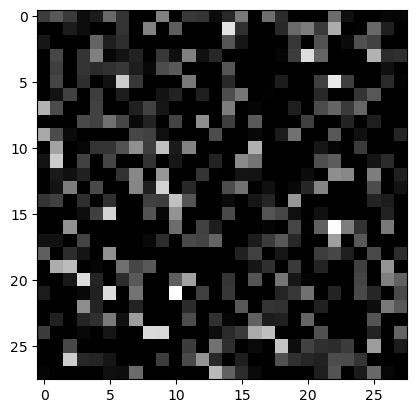

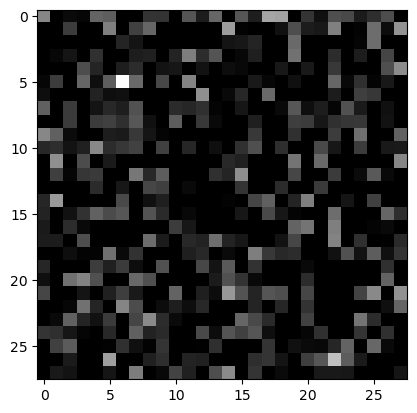

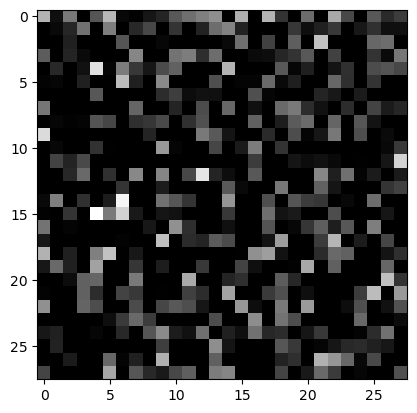

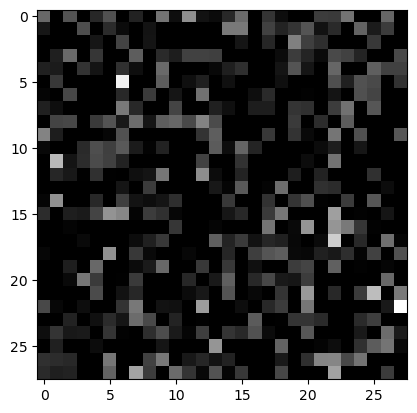

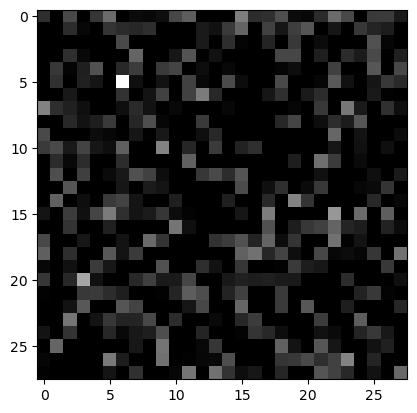

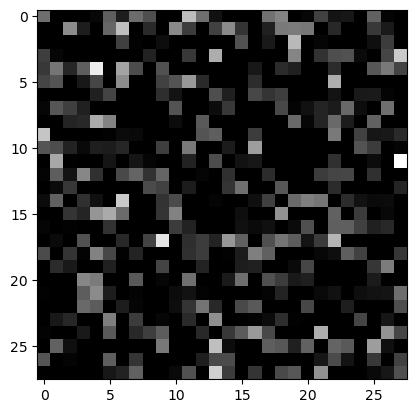

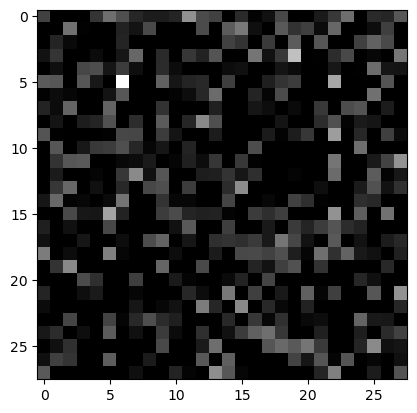

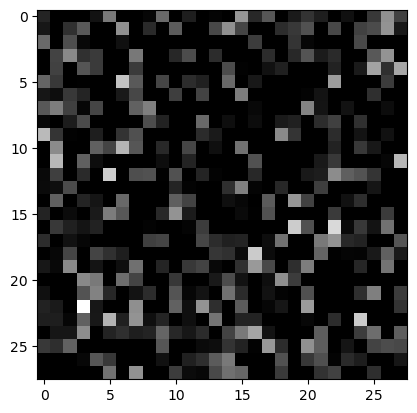

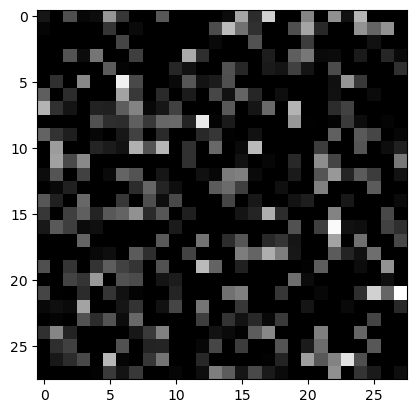

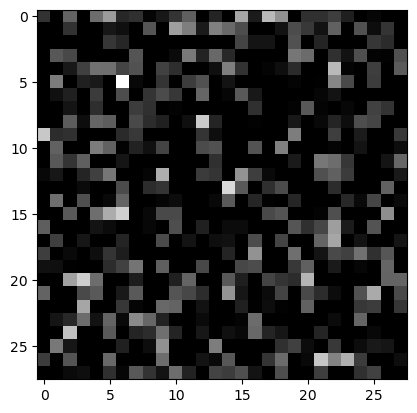

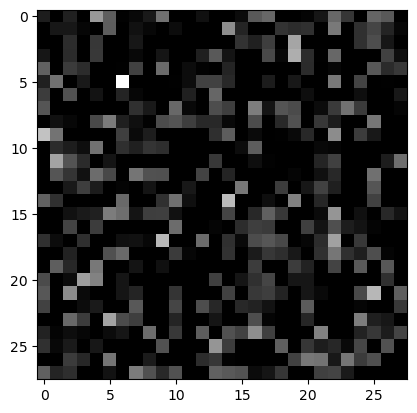

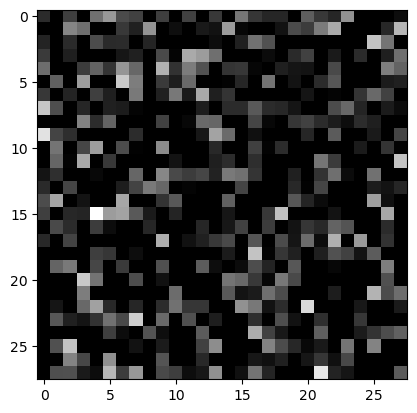

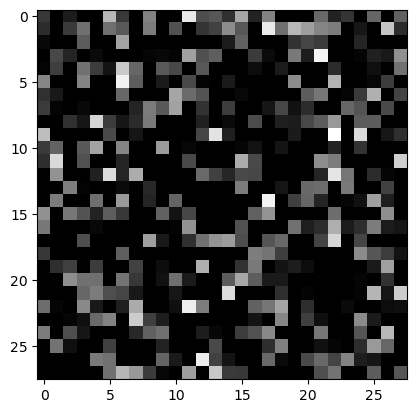

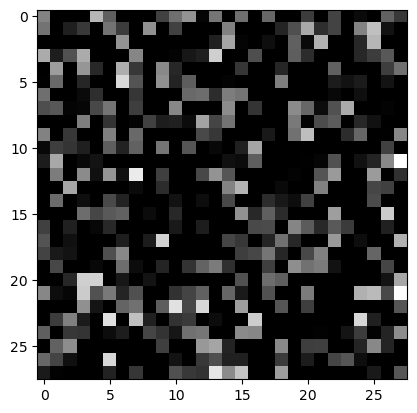

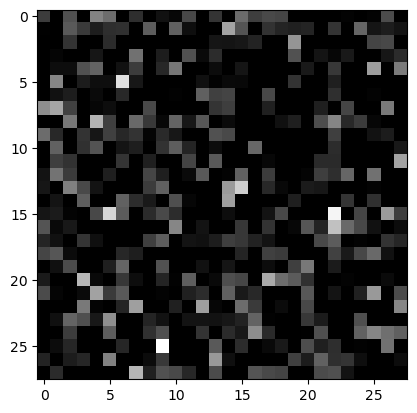

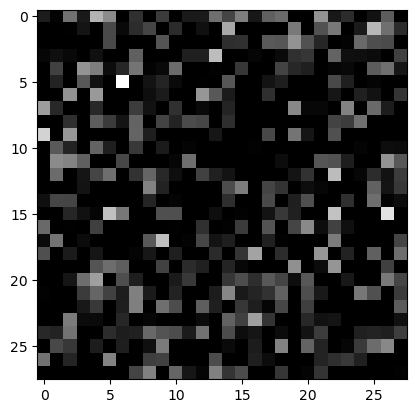

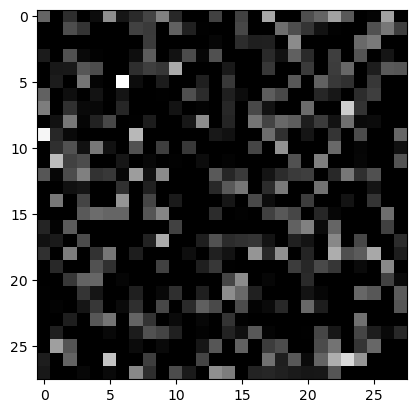

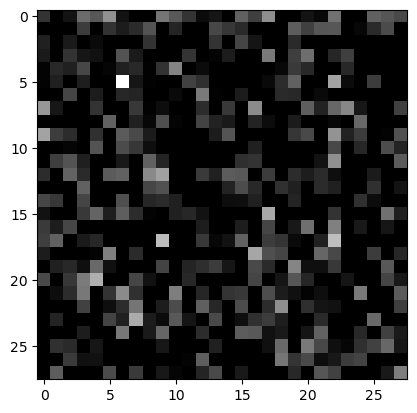

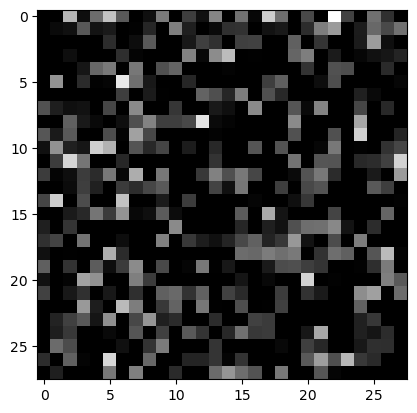

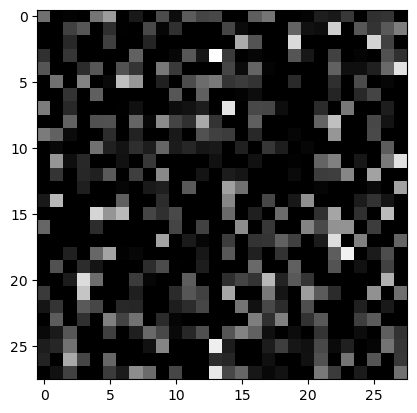

In [44]:
amostras = np.random.normal(size=(20,100))
previsao = gerador.predict(amostras)
for i in range(previsao.shape[0]):
    plt.imshow(previsao[i,:],cmap='gray')
    plt.show()